<a id=section1></a>
## 1. Problem Statement
 
In 2017, a certain production company, ABC decides to produce movies that will earn the best in terms of revenue, popularity and acclaim. This company approaches agency, XYZ and asks them to come up with characteristics of movies that will help them achieve their purpose. Agency gives the task to Nitin. He is given the IMDB database of 1000 movies for the last 10 years (2006-2016). His task is come up with the characteristics of movies that earn:
    1. The Highest Revenue
    2. Popularity (IMDB Rating)
    3. Critical Acclaim (Metacritic Rating)
    
The production company also wants to know whether this is the right time to invest in the movie industry and what strategy they should use to maximize benefits." 


<a id=section2></a>
## 2. Background
The dataset is taken from the IMDB database. It contains data of 1000 most popular movies(by IMDB rating) for the period 2006-2016.
IMDB (Internet Movie Database) is an online database of information related to films, television programs, home videos and video games, and internet streams, including cast, production crew and personnel biographies, plot summaries, trivia, and fan reviews and ratings.
Users registered on this site are invited to rate any film on a scale of 1 to 10, and the totals are converted into a weighted mean-rating that is displayed beside each title.
It also displays the Metascore of each title. Metascore is the rating given by another movie rating company called Metacritic. However, unlike IMDB, they get ratings from registered well known rating agencies and calculates a weighted average of those ratings.
Below is the data dictionary explaining the various columns of the dataset.
    | Columns              | Description     |
    |---------             |-----------------|
    |   Rank               | Movie rank order|
    | Title                |The title of the film|
    |Genre                 | A comma-separated list of genres used to classify the film|
    |Description           |Brief one-sentence movie summary|
    |Director              |The name of the film's director|
    |Actors                |A comma-separated list of the main stars of the film|
    |Year                  |The year that the film released as an integer.|
    |Runtime (Minutes)     |The duration of the film in minutes.|
    |Rating                |User rating for the movie 0-10|
    |Votes                 |Number of votes|
    |Revenue (Millions)    | Movie revenue in millions|
    |Metascore             |An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent     positive reviews.|

<a id=section3></a>
## 3. Preparing the data for analysis

In [ ]:
In this section, we are going to<b> Wrangle<b> the dataset. This involves Gathering, Assessing and Cleaning the data.

In [14]:
#Import the required packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [15]:
#Read the data into Pandas DataFrame
movies = pd.read_csv('https://raw.githubusercontent.com/koyeliaghosh/Term-1/master/Data/Projects/1000%20movies%20data.csv')

In [16]:
<a id=section301></a>
#### Examining the Dataset ####

SyntaxError: invalid syntax (<ipython-input-16-0e414df8448a>, line 1)

In [17]:
#Examine the head entries of the dataset 
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [18]:
#Find out the total rows and columns of the DataFrame 
movies.shape


(1000, 12)

In [19]:
##### Why is unique 'Titles' count not equal to the no: of rows of the dataset. Are there any duplicate movies ?#####


In [20]:
#check for number of unique values for the column 'Title'
movies.Title.nunique()

999

In [21]:
#Check for duplicate values in the column 'Title'
movies.Title.duplicated().any()

True

In [22]:
#Find out the movies with Duplicate 'Title'
movies.loc[movies.Title.duplicated(keep =False)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
239,240,The Host,"Action,Adventure,Romance",When an unseen enemy threatens mankind by taki...,Andrew Niccol,"Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger",2013,125,5.9,96852,26.62,35.0
632,633,The Host,"Comedy,Drama,Horror",A monster emerges from Seoul's Han River and f...,Bong Joon Ho,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...",2006,120,7.0,73491,2.20,85.0


  ##### There are no duplicate movies.The movie with Title"The Host" was released on 2006 and 2013. So they are 2 different movies #####

#Count the number of missing values in each column 
movies.isnull().sum()

In [32]:
def missing_value_pct(series):
# Returns the missing value percentage of a series#

    return series.isnull().mean()

In [24]:
#Percentage of missing values in Revenue column
missing_value_pct(movies["Revenue (Millions)"])

0.128

In [25]:
#Percentage of missing values in Metascore column
missing_value_pct(movies["Metascore"])

0.064

In [26]:
##### Revenue (Millions)" and "Metascore" are important fields for EDA of this dataset, hence these columns cannot be dropped.

The percentage of rows that hace misssing values for "Revenue (Millions)"  is 12.8% , which is high , hence need to be filled in. 

The percentage of rows that have missing values for "Metascore" is 6.4% which is quite low . Hence these rows could be dropped which has missing value for this column.
#####


SyntaxError: invalid syntax (<ipython-input-26-ec41eaed3f18>, line 3)

In [27]:
<a id=section302></a>
#### Pre-Profiling #### 

SyntaxError: invalid syntax (<ipython-input-27-6e895d3bfda9>, line 1)

In [28]:
#using the pandas_profiling lib to generate report before pre-processing #'

!pip install --upgrade pip 

     |████████████████████████████████| 1.5MB 1.5MB/s eta 0:00:01
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [29]:
import pandas_profiling 
# Using the pandas_profiling lib to generate report before pre-processing
movies_profile = pandas_profiling.ProfileReport(movies)
movies_profile.to_file(outputfile="movies_preprocessing.html")

ImportError: No module named 'pandas_profiling'

In [ ]:
<a id=section303></a>
Pre-processing 
Pre-profiling output shows the distribution of "Revenue(Millions)" is right skewed.so let's fill these missing value with the median value'

In [39]:
# Filling the missing values with the median value
median_revenue = movies['Revenue (Millions)'].median()
movies['Revenue (Millions)'].fillna(value=median_revenue, inplace=True)

In [38]:
#Check if there are anymore missing values
movies['Revenue (Millions)'].isnull().any()

False

In [40]:
#Dropping the rows that having missing values for 'Metascore'
movies.dropna(subset=['Metascore'], inplace=True)

In [41]:
# Check if there are anymore missing values
movies.Metascore.isnull().any()

False

In [42]:
#Check the new shape of the dataset
movies.shape

(936, 12)

In [43]:
<a id=section304></a>
#### Post -Profiling ####

SyntaxError: invalid syntax (<ipython-input-43-ddcd6d418d23>, line 1)

In [44]:
<a id=section305></a>
#### Checking for incorrect Data Type ####

SyntaxError: invalid syntax (<ipython-input-44-05ff918b779a>, line 1)

In [45]:
movies.dtypes

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [46]:
##### The movies columns and their datatypes seems to be mapped correctly. So no correction in datatypes required

It is a good idea to set the index of the DataFrame to movie title as the titles are unique #####

SyntaxError: invalid syntax (<ipython-input-46-ca35dd044e5c>, line 3)

In [47]:
# Rename the columns 'Runtime (Minutes) and 'Revenue (Millions)' for ease of accessing columns
movies.rename(columns={'Runtime (Minutes)' : 'Runtime', 'Revenue (Millions)': 'Revenue'}, inplace=True)

In [48]:
# Check the head entries to see the changes
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [49]:
# Finally check for any missing values in the whole DataFrame
movies.isnull().any().any()

False

In [50]:
<a id=section4></a>
## 4. Questions & EDA
In this section, we are going to Question/Explore the dataset. This involves asking Questions, Exploring and Augmenting the dataset based on the questions. We will use descriptive statistics and also data visualization to help us explore the dataset.




SyntaxError: invalid syntax (<ipython-input-50-4532788d1a0e>, line 1)

In [51]:
<a id=section4.1></a>
4.1 Find out the impact of directors on the movie


SyntaxError: invalid syntax (<ipython-input-51-024906d5da7c>, line 1)

In [52]:
<a id=section4.1.1></a>
4.1.1 Does a particular director's movies receive higher Revenue ?

SyntaxError: invalid syntax (<ipython-input-52-b401ebc938d4>, line 1)

In [53]:
# Calculate the number of movies directed by each director over the 12 year period
movies.Director.value_counts().head(12)

Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
Peter Berg            5
Justin Lin            5
Danny Boyle           5
J.J. Abrams           5
Woody Allen           5
David Fincher         5
Martin Scorsese       5
Name: Director, dtype: int64

In [54]:
# Find out the top 5 directors by Revenue
revenue_directors = movies.groupby('Director').agg({'Revenue': 'mean', 'Rank': 'count'})
top_5_revenue_directors = revenue_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Revenue', ascending=False)[:5]
top_5_revenue_directors

,Revenue,Movies Count
Director,,
James Cameron,760.510,1
Colin Trevorrow,652.180,1
Joss Whedon,541.135,2
Lee Unkrich,414.980,1
Gary Ross,408.000,1


[Text(0,0,'James Cameron'),
 Text(0,0,'Colin Trevorrow'),
 Text(0,0,'Joss Whedon'),
 Text(0,0,'Lee Unkrich'),
 Text(0,0,'Gary Ross')]

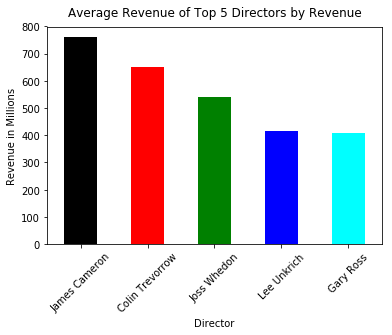

In [173]:
# Plot the result
ax = top_5_revenue_directors['Revenue'].plot.bar(color=['black', 'red', 'green', 'blue', 'cyan']);
ax.set_ylabel('Revenue in Millions')
ax.set_title('Average Revenue of Top 5 Directors by Revenue', y=1.02)
ax.set_xticklabels(top_5_revenue_directors.index, rotation = 45)


In [56]:
<a id=section 4.1.2></a>
Does a particular director's movies receive higher IMDB Rating ?

SyntaxError: invalid syntax (<ipython-input-56-916518e740a3>, line 1)

In [57]:
# Find out the top 5 directors by IMDB Rating
rating_directors = movies.groupby('Director').agg({'Rating': 'mean', 'Rank': 'count'})
top_5_rating_directors = rating_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Rating', ascending=False)[:5]
top_5_rating_directors

,Rating,Movies Count
Director,,
Christopher Nolan,8.68,5
Makoto Shinkai,8.60,1
Olivier Nakache,8.60,1
Aamir Khan,8.50,1
Florian Henckel von Donnersmarck,8.50,1


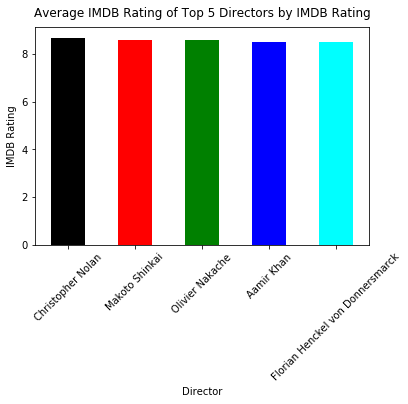

In [175]:
# Plot the result
ax = top_5_rating_directors['Rating'].plot.bar(color=['black', 'red', 'green', 'blue', 'cyan']);
ax.set_ylabel('IMDB Rating')
ax.set_title('Average IMDB Rating of Top 5 Directors by IMDB Rating', y=1.02)
ax.set_xticklabels(top_5_rating_directors.index, rotation = 45);

In [59]:
<a id=section 4.1.3></a>
4.1.3 Does a particular director's movies receive higher Metacritic score 

SyntaxError: invalid syntax (<ipython-input-59-e45a571e997d>, line 1)

In [60]:
# Find out the top 5 directors by Metacritic Score
meta_directors = movies.groupby('Director').agg({'Metascore': 'mean', 'Rank': 'count'})
top_5_meta_directors = meta_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Metascore', ascending=False)[:5]
top_5_meta_directors

,Metascore,Movies Count
Director,,
Barry Jenkins,99.0,1
Kenneth Lonergan,96.0,1
Todd Haynes,95.0,1
Kathryn Bigelow,94.5,2
Michael Goi,94.0,1


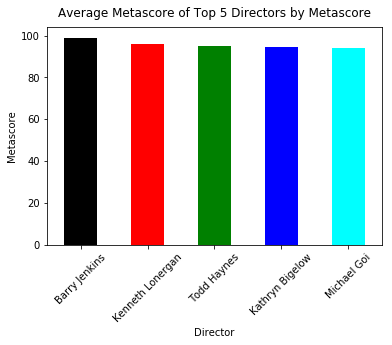

In [176]:
# Plot the result
ax = top_5_meta_directors['Metascore'].plot.bar(color=['black', 'red', 'green', 'blue', 'cyan']);
ax.set_ylabel('Metascore')
ax.set_title('Average Metascore of Top 5 Directors by Metascore', y=1.02)
ax.set_xticklabels(top_5_meta_directors.index, rotation = 45);



In [ ]:
# Lets take the list of all directors who have directed total number of movies of 5 or more.
most_active_directors = movies['Director'].value_counts()[movies['Director'].value_counts() >= 5]
most_active_directors

In [63]:
# Find out the movies of these active directors
active_director_movies = movies[movies.Director.isin(most_active_directors.index.tolist())]
active_director_movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0
19,20,Arrival,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.0
34,35,Resident Evil: The Final Chapter,"Action,Horror,Sci-Fi",Alice returns to where the nightmare began: Th...,Paul W.S. Anderson,"Milla Jovovich, Iain Glen, Ali Larter, Shawn R...",2016,107,5.6,46165,26.84,49.0


In [201]:
# Find out the Average Revenue, Rating and Metascore of movies directed by the above Directors
active_director_stats = active_director_movies.groupby('Director')['Revenue', 'Rating', 'Metascore'].mean()
active_director_stats

,Revenue,Rating,Metascore
Director,,,
Antoine Fuqua,78.642000,7.040000,52.400000
Christopher Nolan,303.018000,8.680000,74.800000
Danny Boyle,36.680000,7.420000,75.000000
David Fincher,105.544000,7.820000,78.600000
David Yates,271.751667,7.433333,68.500000
Denis Villeneuve,43.242000,7.760000,75.600000
J.J. Abrams,336.690000,7.580000,74.600000
Justin Lin,164.958000,6.820000,57.200000
M. Night Shyamalan,69.745833,5.533333,40.000000


In [67]:
#### We have just found the top directors in terms of movie Revenue, Rating and Metascore.####


In [68]:
<a id=section4.2.1></a>
How does the runtime of movies affect them?

SyntaxError: invalid syntax (<ipython-input-68-0c82346015e0>, line 1)

In [69]:
# Find out the percentiles of the Runtime column 
movies.Runtime.describe()

count    936.000000
mean     113.272436
std       18.550798
min       66.000000
25%      100.000000
50%      111.000000
75%      123.000000
max      187.000000
Name: Runtime, dtype: float64

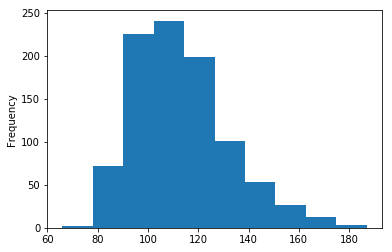

In [179]:
# Plot the distribution of the runtime column
movies.Runtime.plot.hist()

am going to classify the Runtime into different levels based on the output from the describe method

| Runtime (in minutes) | Level|
| --- | ---|
| 66 -100 | Short|
|100-111| Medium |
|111 -123 |Moderately Long
 |123-187|Long


In [71]:
# Use the Pandas cut method to map the Runtime into the above levels
runtime_bin_edges = [66, 100, 111, 123, 187]
runtime_bin_names = ['Short', 'Medium', 'Moderately Long', 'Long']
movies['Runtime_levels'] = pd.cut(movies.Runtime, runtime_bin_edges, labels=runtime_bin_names)
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Runtime_levels
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Moderately Long
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Long
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Moderately Long
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Medium
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Moderately Long


Text(0.5,1.02,'Movies Count of each Runtime level')

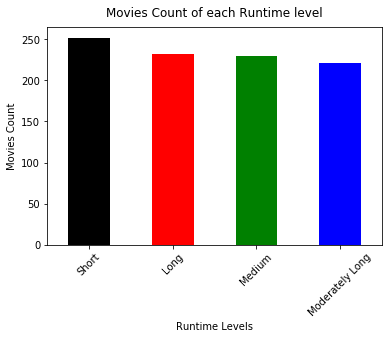

In [180]:
# Plot the count of different Runtime levels
ax = movies.Runtime_levels.value_counts().plot.bar(color=['black', 'red', 'green', 'blue', 'cyan']);
ax.set_ylabel('Movies Count');
ax.set_xlabel('Runtime Levels')
ax.set_xticklabels(movies.Runtime_levels.value_counts().index, rotation = 45);
ax.set_title('Movies Count of each Runtime level', y=1.02)

In [73]:
<a id=section4.2.1></a>
4.2.1 Which interval of Runtime receives higher revenue ?


SyntaxError: invalid syntax (<ipython-input-73-8d4fffc9c43e>, line 1)

In [74]:
# Find out the Runtime level that receives the highest mean revenue, mean Rating and mean Metascore
Runtime_stats = movies.groupby('Runtime_levels')['Revenue', 'Rating', 'Metascore'].mean()
Runtime_stats

,Revenue,Rating,Metascore
Runtime_levels,,,
Short,58.164940,6.327381,56.456349
Medium,66.974196,6.579130,55.273913
Moderately Long,66.366244,6.848869,59.276018
Long,132.925733,7.195690,65.021552


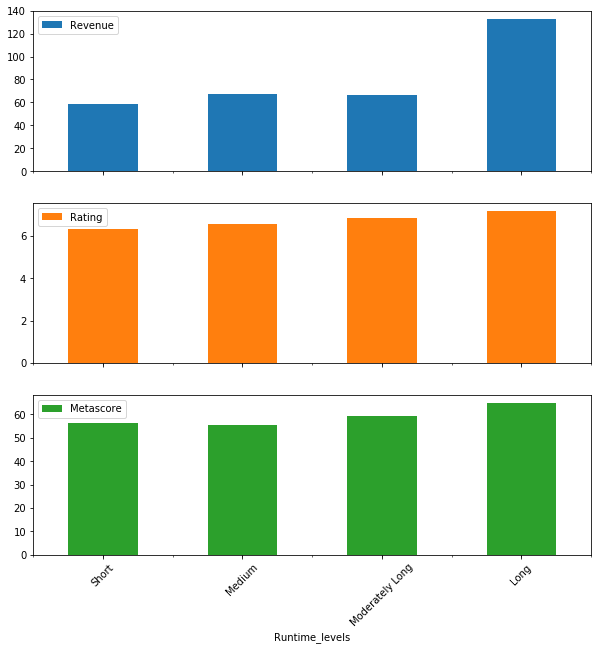

In [182]:
# Plot the above results
ax1, ax2, ax3 = Runtime_stats.plot.bar(subplots=True);
fig = ax1.get_figure()
fig.set_size_inches(10, 10)
ax1.set_title("")
ax2.set_title("")
ax3.set_title("")
ax3.set_xticklabels(Runtime_stats.index, rotation = 45);

In [76]:
####1. In general, movies that have Long Runtimes (greater than 123 minutes) earns higher Revenue, more popular and critically acclaimed.
2. As the Runtime increases the movies tends to earn higher Revenue, higher popularity and critical acclaim
3. It should be noted that, movies with Runtime (greater than 123 minutes) beats other movies in terms of Revenue by a significant margin.
####

SyntaxError: invalid syntax (<ipython-input-76-e2b019cdcb09>, line 2)

In [77]:
<a id=section4.3></a>
4.3 How does the Genre of a movie affect the outcome of the movie ?


SyntaxError: invalid syntax (<ipython-input-77-d36e096d3a2f>, line 1)

In [78]:
<a id=section4.3.1></a>
4.3.1 Does the total number of Genres in the movie affect the revenue, popularity, critical acclaim of the movie ?

SyntaxError: invalid syntax (<ipython-input-78-e291d92f126c>, line 1)

In [79]:
# The Genre column contains Genre combination as string separated by comma
movies['Genre_count'] = movies.Genre.str.split(',').str.len()

In [80]:
movies.Genre_count.head()

0    3
1    3
2    2
3    3
4    3
Name: Genre_count, dtype: int64

In [81]:
# Calculate the Average Revenue, Rating and Metascore of movies based on the Genre_count
genre_count_stats = movies.groupby('Genre_count')['Revenue', 'Rating', 'Metascore'].mean()
genre_count_stats

,Revenue,Rating,Metascore
Genre_count,,,
1,46.641848,6.365217,58.793478
2,55.710591,6.695455,58.677273
3,94.583734,6.794712,59.121795


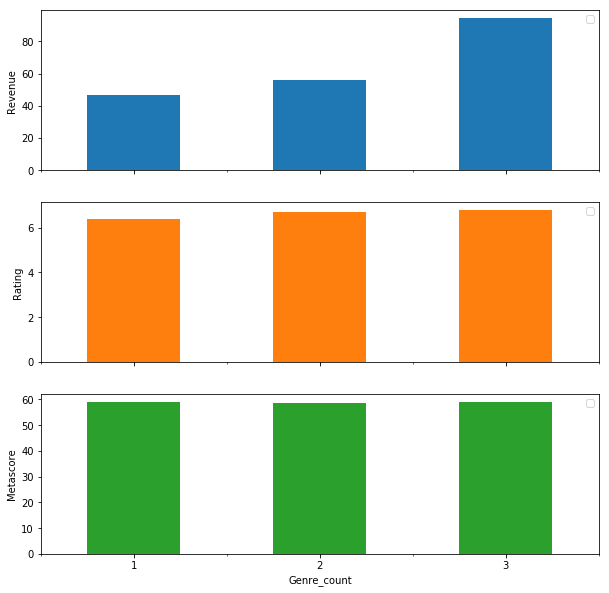

In [82]:
# Plot the results above
ax1, ax2, ax3 = genre_count_stats.plot.bar(subplots=True);
fig = ax1.get_figure()
fig.set_size_inches(10, 10)
ax1.set_ylabel("Revenue")
ax1.legend("")
ax1.set_title("")
ax2.set_ylabel("Rating")
ax2.legend("")
ax2.set_title("")
ax3.set_ylabel("Metascore")
ax3.legend("")
ax3.set_title("")
ax3.set_xticklabels(genre_count_stats.index, rotation = 0.05);

In [83]:
####  1. Very interesting: The number of Genres in the movie increase the Revenue of the movie significantly. On average, a movie with 3 Genres tends to earn double the revenue than a movie with only 1 Genre.
2. Interestingly, the number of Genres in a movie does not impact IMDB Rating or Metascore significantly. However both the IMDB Rating and Metascore are on the rise when Genre count increases.
3. If we think about the finding a little carefully, the Genres do not show up explicitly in a movie. Viewers are unaware of it while seeing the movie. But the number of Genres do have an impact overall to a viewer. However, when a viewer sits down to rate the movie, he does not rate based on the number of Genres in the movie. He rates it based on his likeness for the movie overall.
####

SyntaxError: invalid syntax (<ipython-input-83-0dc0c1d303ea>, line 2)

In [ ]:
<a id=section4.3></a>
4.3 How does the Genre of a movie affect the outcome of the movie ? <br>

In [ ]:
<a id=section4.3.1></a>
4.3.1 What are the Genres that that bring higher Revenue, higher rating and higher critical acclaim for a movie?

In [84]:
####Since we know that a Genre count of 3 brings the best out a movie, lets find out which combination of 3 Genres earns more Revenue, rating and critical acclaim####

In [154]:
genre_3_df = movies[movies.Genre_count == 3]

In [155]:
genre_3_df = genre_3_df.groupby('Genre')['Revenue', 'Rating', 'Metascore'].mean()

Text(0.5,0,'Revenue')

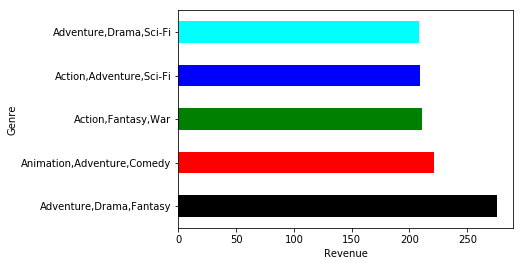

In [183]:
ax = genre_3_df.Revenue.sort_values(ascending=False).head(5).plot.barh(color=['black', 'red', 'green', 'blue', 'cyan']);
ax.set_xlabel('Revenue')

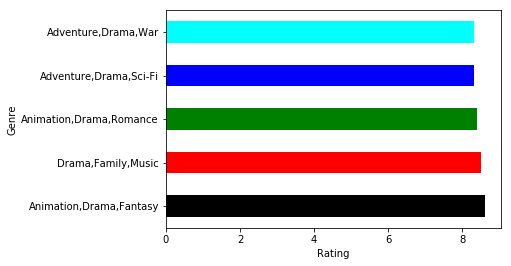

In [184]:
ax = genre_3_df.Rating.sort_values(ascending=False).head(5).plot.barh(color=['black', 'red', 'green', 'blue', 'cyan']);
ax.set_xlabel('Rating');

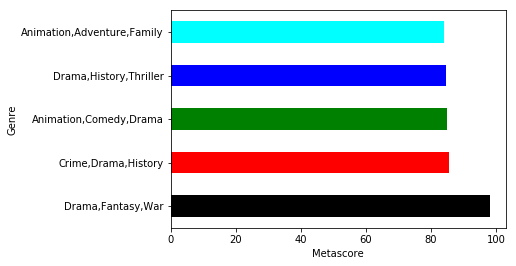

In [185]:
ax = genre_3_df.Metascore.sort_values(ascending=False).head(5).plot.barh(color=['black', 'red', 'green', 'blue', 'cyan']);
ax.set_xlabel('Metascore');

In [90]:
####
1. The combination of Genres: Animation, Drama and Fantasy produces the highest Revenue.
2. The combination of Genres: Animation, Drama and Fantasy produces the highest Rating.
3. However, critics mostly like movies which contains the combination of Drama, Fantasy and War
####

SyntaxError: invalid syntax (<ipython-input-90-ef35ed01121d>, line 2)

In [91]:
<a id=section4.4></a>
4.4. Is the growth of the movie industry on the rise ?<br>

SyntaxError: invalid syntax (<ipython-input-91-81006a8d85b3>, line 1)

In [92]:
<a id=section4.4.1></a>
4.4.1 Is the number of movies increasing over the years ?<br>

SyntaxError: invalid syntax (<ipython-input-92-8a59da0d6fd5>, line 1)

In [93]:
movies_year = movies.groupby('Year')['Rank'].count()

In [94]:
movies_year.head()

Year
2006    41
2007    46
2008    49
2009    49
2010    59
Name: Rank, dtype: int64

Text(0,0.5,'Movies Count')

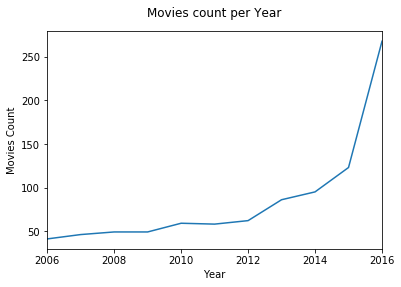

In [95]:
# Plot the movies count per year
ax = movies_year.plot.line();
ax.set_title('Movies count per Year', y=1.04)
ax.set_ylabel('Movies Count')

In [96]:
####
1. The number of movies released over the last 10 years period is showing an upward trend.
2. There is dramatic increase(more than double) in the number of movies released in 2016, when compared to the number of movies released in 2015

SyntaxError: invalid syntax (<ipython-input-96-3418f4c91402>, line 2)

In [97]:
<a id=section4.3.2></a>
4.4.2 Is the revenue from movies increasing over the years ?

SyntaxError: invalid syntax (<ipython-input-97-ddf1696bb6df>, line 1)

In [98]:
movies_revenue = movies.groupby('Year')['Revenue'].sum()

In [99]:
movies_revenue.head()

Year
2006    3577.480
2007    4191.230
2008    4729.205
2009    5400.330
2010    6085.620
Name: Revenue, dtype: float64

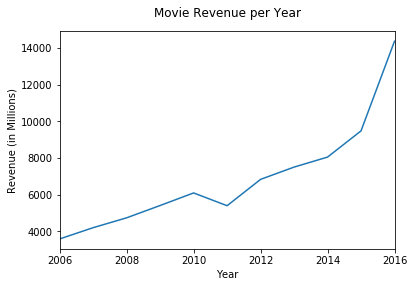

In [100]:
# Plot the Revenue for each year
ax = movies_revenue.plot.line();
ax.set_title('Movie Revenue per Year', y=1.04)
ax.set_ylabel('Revenue (in Millions)');

In [101]:
####
1. The revenue from movies over the last 10 year period is showing an upward trend.
2. There is dramatic increase in the revenue from movies released in 2016, when compared to the revenue from movies released in 2015. This is correlating with the dramatic increase in the number of movies released in 2016 when compared to 2015, as shown in the section 4.4.1
####

SyntaxError: invalid syntax (<ipython-input-101-587d0c3faef5>, line 2)

In [102]:
<a id=section 4.4.2.1></a>
4.4.2.1 Is the average revenue of the movies increasing over the years ?


SyntaxError: invalid syntax (<ipython-input-102-33f7be8908e2>, line 1)

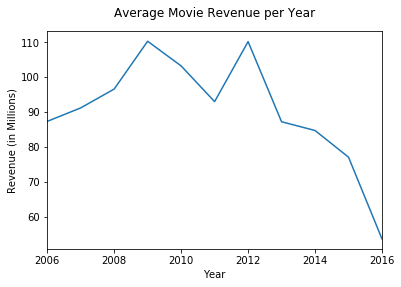

In [103]:
movies_avg_revenue = movies.groupby('Year')['Revenue'].mean()
ax = movies_avg_revenue.plot.line();
ax.set_title('Average Movie Revenue per Year', y=1.04)
ax.set_ylabel('Revenue (in Millions)');

In [104]:
####
1. Why is the average revenue of movies per year decreasing, while the total revenue of movies is increasing over the years?
2. This is most probably because of the fact the total number of movies released per year is increasing. This trend indicates, more producers are coming into the industry and there is huge competition in the industry. As a result, in a year, multiple movies gets released around the same time and the revenue gets distributed among them. So the average revenue of movies in a year also decreases.
3. So probably finding the Director only by the Average Revenue, Average Rating, Average Metascore may not be a good idea. For example James Cameron has only directed a single movie (Avatar in 2009) in the last 10 years. In that year(2009), only 50 movies were released, according to the 'Movies Count per Year' line graph (above). But in 2016, the trend has changed: The number of movies released in 2016 is around 5 times that of movies in 2009.
4. So we need to find out the Directors who are more active in terms of directing more movies. Among them we need to find out directors who earn more revenue, rating and metascore. So let's do that below
####

SyntaxError: invalid syntax (<ipython-input-104-63f3be9d66a5>, line 3)

In [105]:
# Lets take the list of all directors who have directed total number of movies of 5 or more.
most_active_directors = movies['Director'].value_counts()[movies['Director'].value_counts() >= 5]
most_active_directors

Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
Peter Berg            5
Justin Lin            5
Danny Boyle           5
J.J. Abrams           5
Woody Allen           5
David Fincher         5
Martin Scorsese       5
Denis Villeneuve      5
Antoine Fuqua         5
Zack Snyder           5
Christopher Nolan     5
Name: Director, dtype: int64

In [106]:
# Find out the movies of these active directors
active_director_movies = movies[movies.Director.isin(most_active_directors.index.tolist())]
active_director_movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Runtime_levels,Genre_count
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Long,3
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Moderately Long,2
10,11,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072,234.02,66.0,Long,3
19,20,Arrival,"Drama,Mystery,Sci-Fi",When twelve mysterious spacecraft appear aroun...,Denis Villeneuve,"Amy Adams, Jeremy Renner, Forest Whitaker,Mich...",2016,116,8.0,340798,100.50,81.0,Moderately Long,3
34,35,Resident Evil: The Final Chapter,"Action,Horror,Sci-Fi",Alice returns to where the nightmare began: Th...,Paul W.S. Anderson,"Milla Jovovich, Iain Glen, Ali Larter, Shawn R...",2016,107,5.6,46165,26.84,49.0,Medium,3


In [107]:
# Find out the Average Revenue, Rating and Metascore of movies directed by the above Directors
active_director_stats = active_director_movies.groupby('Director')['Revenue', 'Rating', 'Metascore'].mean()
active_director_stats

,Revenue,Rating,Metascore
Director,,,
Antoine Fuqua,78.642000,7.040000,52.400000
Christopher Nolan,303.018000,8.680000,74.800000
Danny Boyle,36.680000,7.420000,75.000000
David Fincher,105.544000,7.820000,78.600000
David Yates,271.751667,7.433333,68.500000
Denis Villeneuve,43.242000,7.760000,75.600000
J.J. Abrams,336.690000,7.580000,74.600000
Justin Lin,164.958000,6.820000,57.200000
M. Night Shyamalan,69.745833,5.533333,40.000000


In [108]:
# Lets find out the top 5 active directors by average revenue
top_5_active_directors_by_revenue = active_director_stats.sort_values('Revenue', ascending=False)
top_5_active_directors_by_revenue[:5]

,Revenue,Rating,Metascore
Director,,,
J.J. Abrams,336.690000,7.580000,74.600000
Christopher Nolan,303.018000,8.680000,74.800000
David Yates,271.751667,7.433333,68.500000
Michael Bay,236.886667,6.483333,43.833333
Zack Snyder,195.148000,7.040000,48.000000


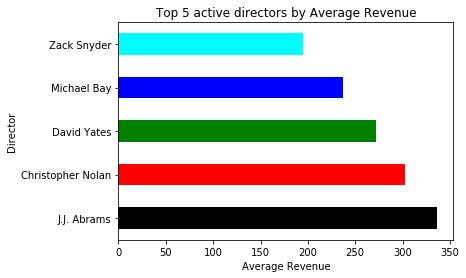

In [186]:
ax = top_5_active_directors_by_revenue[:5].Revenue.plot.barh(color=['black', 'red', 'green', 'blue', 'cyan']);
ax.set_title("Top 5 active directors by Average Revenue")
ax.set_xlabel('Average Revenue');

In [110]:
# Lets find out the top 5 active directors by average rating
top_5_active_directors_by_rating = active_director_stats.sort_values('Rating', ascending=False)
top_5_active_directors_by_rating[:5]

,Revenue,Rating,Metascore
Director,,,
Christopher Nolan,303.018,8.68,74.8
Martin Scorsese,91.622,7.92,77.0
David Fincher,105.544,7.82,78.6
Denis Villeneuve,43.242,7.76,75.6
J.J. Abrams,336.690,7.58,74.6


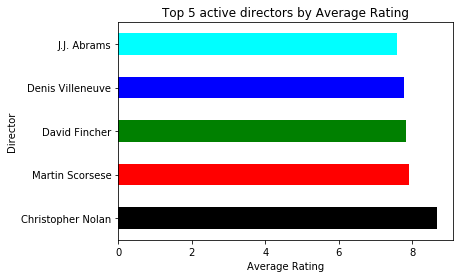

In [187]:
ax = top_5_active_directors_by_rating[:5].Rating.plot.barh(color=['black', 'red', 'green', 'blue', 'cyan']);
ax.set_title("Top 5 active directors by Average Rating")
ax.set_xlabel('Average Rating');



In [112]:
# Lets find out the top 5 active directors by average metascore
top_5_active_directors_by_metascore = active_director_stats.sort_values('Metascore', ascending=False)
top_5_active_directors_by_metascore[:5]

,Revenue,Rating,Metascore
Director,,,
David Fincher,105.544,7.82,78.6
Martin Scorsese,91.622,7.92,77.0
Denis Villeneuve,43.242,7.76,75.6
Danny Boyle,36.680,7.42,75.0
Christopher Nolan,303.018,8.68,74.8


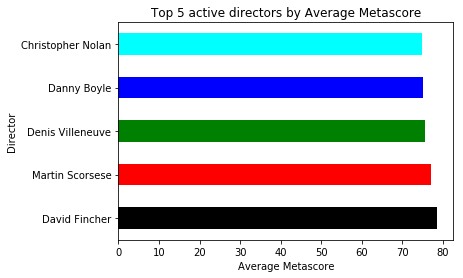

In [188]:
ax = top_5_active_directors_by_metascore[:5].Metascore.plot.barh(color=['black', 'red', 'green', 'blue', 'cyan']);
ax.set_title("Top 5 active directors by Average Metascore")
ax.set_xlabel('Average Metascore');

In [114]:
<a id=section 4.4.3></a>
4.4.3 Is the popularity of the movies increasing over the years?

SyntaxError: invalid syntax (<ipython-input-114-9264b6971c7b>, line 1)

In [115]:
movies_rating = movies.groupby('Year')['Rating'].mean()
movies_rating.head()

Year
2006    7.143902
2007    7.130435
2008    6.716327
2009    6.944898
2010    6.820339
Name: Rating, dtype: float64

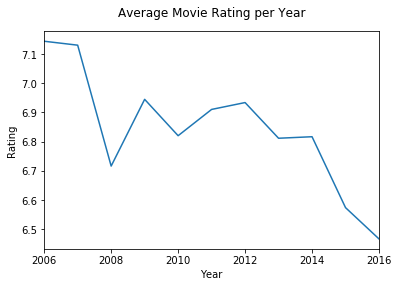

In [116]:
ax = movies_rating.plot.line();
ax.set_title('Average Movie Rating per Year', y=1.04)
ax.set_ylabel('Rating');

In [117]:
#### Let's analyze the Genres, Runtime levels for the movies in 2016 ####

In [118]:
movies.query('Year == 2016').Genre_count.value_counts()

3    157
2     64
1     47
Name: Genre_count, dtype: int64

In [119]:
movies.query('Year == 2016').Genre.value_counts().head(10)

Drama                         23
Comedy                        13
Comedy,Drama                  10
Horror,Thriller               10
Animation,Adventure,Comedy     9
Action,Adventure,Fantasy       7
Action,Crime,Drama             7
Crime,Drama,Thriller           7
Comedy,Drama,Romance           7
Action,Adventure,Sci-Fi        7
Name: Genre, dtype: int64

In [120]:
####
The 3 most popular Genre combinations are (as found in section 4.3.2):
'Animation,Drama, Fantasy'
'Drama,Family,Music'
'Animation,Comedy,Drama'
Let's analyze the movie counts of these Genre combinations in 2016
####

SyntaxError: invalid syntax (<ipython-input-120-24d3a8d3565a>, line 2)

In [121]:
movies.query('Year == 2016').Genre.value_counts().loc['Animation,Drama,Fantasy']

1

In [122]:
'Drama,Family,Music' in movies.query('Year == 2016').Genre.value_counts().index

False

In [123]:
'Animation,Comedy,Drama' in movies.query('Year == 2016').Genre.value_counts().index

True

In [124]:
movies.query('Year == 2016').Genre.value_counts().loc['Animation,Comedy,Drama']

1

In [125]:
import itertools 

In [126]:
#Since most of these films in the data set are part of multiple genres, we need to get a list
#of entirely unique genres, without repeats, to see how many genres we are truly dealing with

unique_genres = movies['Genre'].unique()
individual_genres = []
for genre in unique_genres:
    individual_genres.append(genre.split(','))

individual_genres = list(itertools.chain.from_iterable(individual_genres))
individual_genres = set(individual_genres)

individual_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [127]:
#Determine the percent of total entries are attributed to each genre. Keep in mind that 
#since some films have multiple genres, these percentages won't add to 100%

genre_pcts = np.zeros(len(individual_genres))
i = 0
for genre in individual_genres:
    current_genre = movies['Genre'].str.contains(genre).fillna(False)
    pct = len(movies[current_genre]) / 1000 * 100
    genre_pcts[i] = pct
    i += 1
    print(genre, pct)

Music 2.1
Fantasy 9.8
Comedy 26.8
Western 0.6
Family 5.0
Romance 13.100000000000001
Drama 47.4
Crime 14.099999999999998
Sport 1.6
Thriller 18.3
History 2.8000000000000003
Horror 10.8
Adventure 24.9
Mystery 9.9
War 1.2
Action 28.9
Animation 4.6
Biography 7.1
Sci-Fi 11.4
Musical 0.5


In [128]:
#Throw our genre percentage values into a DF for easy plotting

genre_pcts_df = pd.DataFrame(genre_pcts, index=individual_genres, columns=['Percent'])
genre_pcts_df

,Percent
Music,2.1
Fantasy,9.8
Comedy,26.8
Western,0.6
Family,5.0
Romance,13.1
Drama,47.4
Crime,14.1
Sport,1.6
Thriller,18.3


Text(0.5,1,'Percent of Total Movies Made from Top 5 Genres')

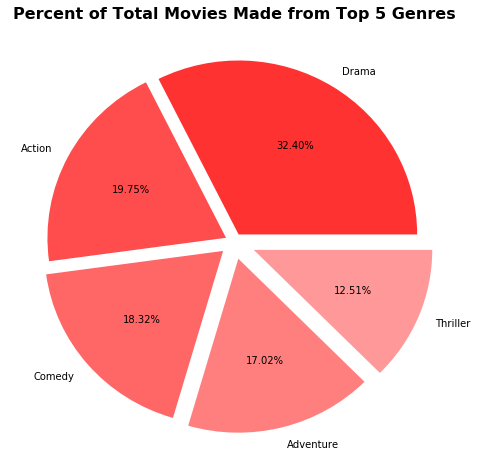

In [129]:
#Taking a sum of the total movies made from the top 5 genres,which contributed to the most in terms of movies made?

explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', ]
genre_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percent of Total Movies Made from Top 5 Genres', weight='bold', fontsize=16)

In [130]:
#Same idea as above, but we can determine revenue percentage

genre_revenue_pcts = np.zeros(len(individual_genres))
i = 0
for genre in individual_genres:
    current_genre = movies['Genre'].str.contains(genre).fillna(False)
    revenue_pct = movies[current_genre].xs('Revenue', axis=1).sum() / movies['Revenue'].sum() * 100
    genre_revenue_pcts[i] = revenue_pct
    i += 1
    print(genre, revenue_pct)

Music 1.5380196520653084
Fantasy 16.579453398234136
Comedy 26.601151842396014
Western 0.7487332869907392
Family 8.01238572653396
Romance 7.518490390660657
Drama 31.61742005141622
Crime 11.569550348475923
Sport 1.3949557502332675
Thriller 16.078809140898034
History 1.9425050117358442
Horror 5.640093516231753
Adventure 51.062836031777124
Mystery 7.023794447437341
War 0.8340872937261629
Action 47.347958378475035
Animation 11.518377643972686
Biography 5.488090601756335
Sci-Fi 19.907419354027642
Musical 0.5401916137901901


In [131]:
genre_revenue_pcts_df = pd.DataFrame(genre_revenue_pcts, index=individual_genres, columns=['Percent'])
genre_revenue_pcts_df

,Percent
Music,1.538020
Fantasy,16.579453
Comedy,26.601152
Western,0.748733
Family,8.012386
Romance,7.518490
Drama,31.617420
Crime,11.569550
Sport,1.394956
Thriller,16.078809


Text(0.5,1,'Percent of Total Revenue from Top 5 Genres')

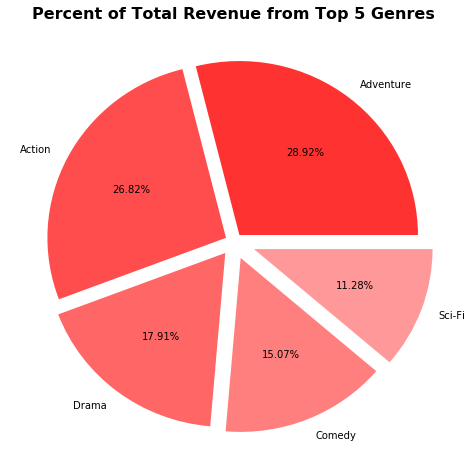

In [132]:
#Taking a sum of the revenue from the top 5 genres,
#which contributed to the most in terms of revenue?

explode = (0.05, 0.05, 0.08, 0.1, 0.12)
colors = ['#ff3232', '#ff4c4c', '#ff6666', '#ff7f7f', '#ff9999', ]
genre_revenue_pcts_df.sort_values(by='Percent', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8), colors=colors, explode=explode)
plt.ylabel('')
plt.title('Percent of Total Revenue from Top 5 Genres', weight='bold', fontsize=16)

ValueError: 'explode' must be of length 'x'

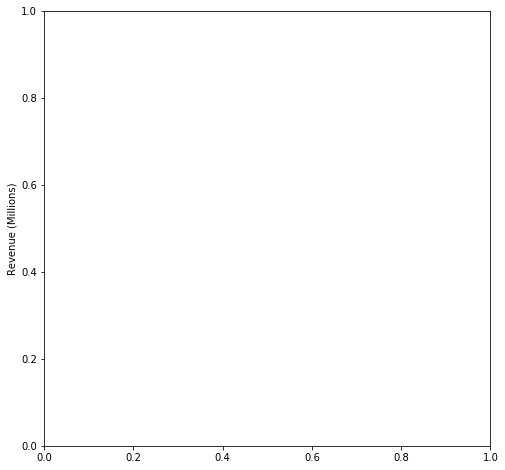

In [134]:
#### In section 4.2 we saw that movies with 'Long' runtime tends to get more IMDB Rating. So Let's analyze the runtime levels for movies in 2016 ####

In [135]:
movies.query('Year == 2016').Runtime_levels.value_counts()

Short              100
Medium              69
Moderately Long     53
Long                45
Name: Runtime_levels, dtype: int64

In [136]:
#### Let's compare the movie runtime levels in 2006 ####

In [137]:
movies.query('Year == 2006').Runtime_levels.value_counts()

Medium             16
Long               13
Moderately Long     9
Short               3
Name: Runtime_levels, dtype: int64

In [138]:
<a id=section4.5></a>
4.5 What is the relationship between Revenue, Rating anfd Metascore of movies ?


SyntaxError: invalid syntax (<ipython-input-138-a8bbb67aa4ff>, line 1)

In [139]:
!pip install --upgrade seaborn 


     |████████████████████████████████| 216 kB 4.2 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.8
    Uninstalling seaborn-0.8:
      Successfully uninstalled seaborn-0.8


In [140]:
#Create an array that contains the column names for what we want to compare the ratings to
#in order to see if ratings have any correlation with other aspects of the movies
ratings_comparisons = ['Revenue', 'Metascore', 'Runtime', 'Votes']

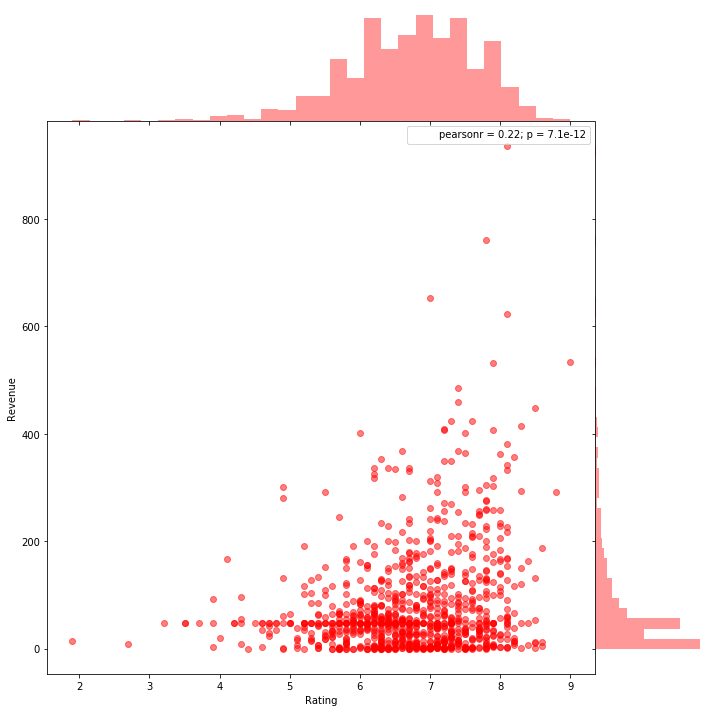

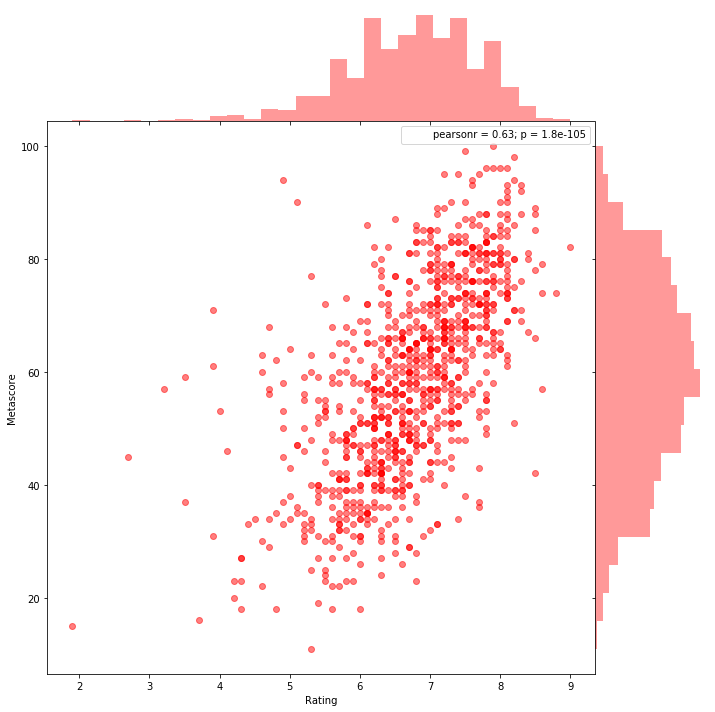

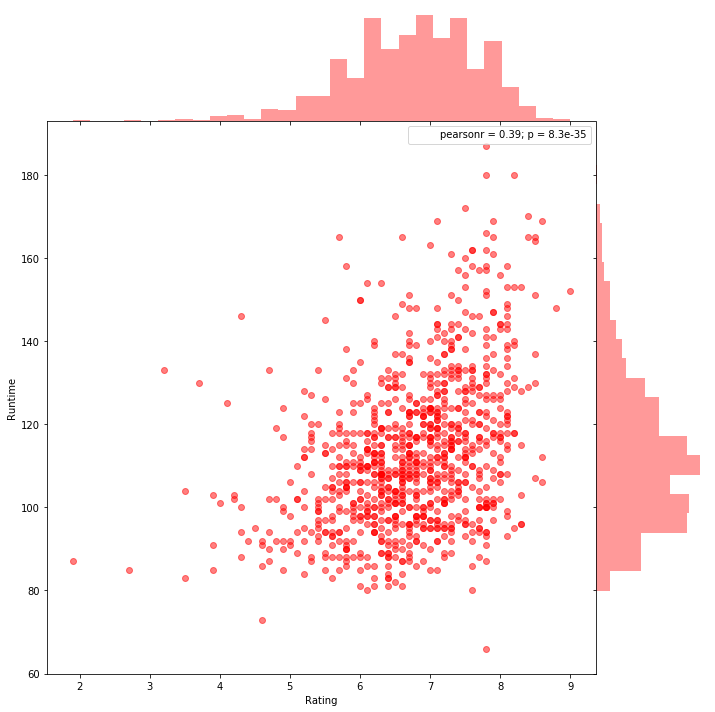

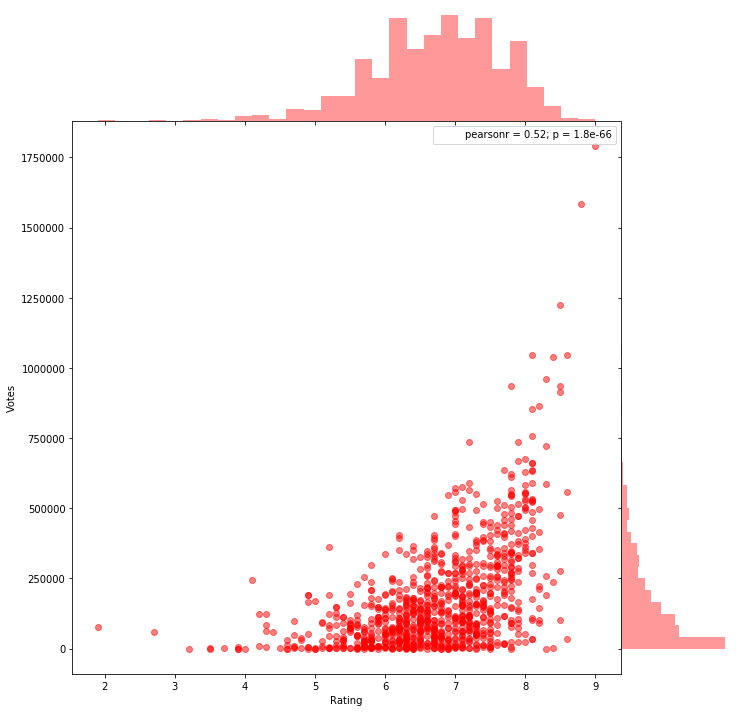

In [141]:
#Created a for loop that iterates through each of the comparisons made above and plots them separately
for comparison in ratings_comparisons:
    sns.jointplot(x='Rating', y=comparison, data=movies, alpha=0.5, color='r', size=10, space=0)

In [142]:
<br>
5. Conclusion
This section draws the conclusion from the exploration done on the dataset in Section 4.

Director
The director who has earned the highest average revenue is James Cameron. However he has directed only 1 movie in the 10 year period.
Christopher Nolan's movies are the most popular among viewers as the average rating for his movies is the highest in the 10 year period. 
Critics liked Barry Jenkins's movies the most. He is closely followed by Kenneth Lonergan and Todd Haynes
Looking at the Movie Industry Trend, most active directors are more favored.
Among the most active directors, J J Abrams's movies earn more in terms of Average Revenue
Christopher Nolan is the most popular active director in terms of Average Rating among people
With respect to Directors who are most active, critics favor David Fincher in terms of Average Metascore.
Runtime
Movies with Long runtimes (> 123 minutes) earn more in terms of Revenue, Rating and Metascore. 
Revenue is dramatically high for movies with Long runtimes
Genre
As the Genre count increases in a movie, its Revenue, Rating and Metascore are on the rise.
However, revenue is significantly high for movies with Genre count of 3.
Adventure as Genre is a common factor for movies that brings in more Revenue, with the Genre combination of "Adventure, Drama, Fantasy" earning the highest Revenue
The most popular Genre is Drama and the Genre combination of "Animation, Drama, Fantasy" earns the highest Rating.
Again Drama is popular among Critics as well, with the Genre combination of "Drama, Fantasy, War" earning the highest Metascore.
Industry Growth
Industry is growing with respect to number of movies released and the total revenue gained year on year.
However, the average revenue of movies year on year is showing a negative trend. This is probably because of increased competition and more movies released in the industry.
The popularity of movies is also showing a negative trend year on year. This is probably because of more movies released with Genre combinations which are unpopular among viewers.
Rating for movies in General
From the correlation graph, it is clear that People and Critics rate movies in a similar manner.
In general, movies with higher rating and metascore tend to earn more revenue as well.


6. Actionable Insights
This section describes the actions the Production company ABC should possibly take to achieve their goal as mentioned in the Problem Statement (Section 1). This is based on the conclusions drawn from the EDA done in Section 4.

Produce multiple movies with best features - The movie industry is growing very fast. More movies are released year on year and the competition is very high and the revenue is distributed among many movies. It would not be a good idea to wait for that ONE BIG MOVIE like Avatar (by James Cameron) that brings highest Revenue, Rating and Metascore. So, produce more movies using the best features (explained below) for reaping the maximum benefits.
Produce movies with active directors - those people who directs multiple moderately high budget movies. For instance, Christopher Nolan movies is certain to bring in more Revenue, Rating and Metascore.
Produce movies that have Long runtimes - Runtime greater than 2 hrs.
Produce movies with 3 Genre combination - Include a mix of Drama, Animation, Adventure, Sci-Fi, Fantasy. The movies should relate to audience with real life incidents, should move them to the edge of the seats and should enhance their imagination.
Produce movies that will satisfy both People and Critics - These movies will earn higher Revenue more often than not.
<br>

SyntaxError: invalid syntax (<ipython-input-142-3ea986456e69>, line 1)